In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
df1 = pd.read_excel("file1.xlsx")
df2 = pd.read_excel("file2.xlsx")

In [218]:
df1.head()

,Contract_Number,Age,Age_proof,Gender,Marital_Status,Sum.Insured,Freq,Policy_Status,Premium,premium_frequency_description,...,Policy.term,Channel,Nominee,Product,Occupation,Education,Location,Income,Policy Date,AFYP
0,2507412,25,Employee Certificate,F,Single,1000000,1,Contract Lapsed,2564,Quarterly,...,30,IVB,Father,T14,Others,NaN,Negative,775562.0,2020-01-01,5128
1,2458565,31,Employee Certificate,M,Married,1000000,2,Contract Lapsed,2548,Quarterly,...,10,Tied Agency,Wife,T08,Salaried,NaN,Top 100,500000.0,2020-01-02,5096
2,2465741,19,PAN Card,M,Married,1000000,3,Contract Lapsed,2125,Annual,...,10,Tied Agency,NaN,T08,Salaried,School,Top 100,1500000.0,2020-01-03,4250
3,2465765,23,Passport,M,Single,1166466,4,Contract Lapsed,2539,Annual,...,10,Tied Agency,NaN,T08,Professional,Post Graduate,Others,750000.0,2020-11-05,5078
4,2465766,32,Driving License,M,Married,1018388,5,Contract Lapsed,2538,Annual,...,10,Tied Agency,NaN,T08,Professional,Post Graduate,Others,NaN,2020-01-05,5076


In [219]:
df2.head()

,Contract_Number,Age,Age_proof,Male/Female,Marital_Status,Sum.Insured,CL_ID,Policy_Status,Premium,premium_frequency_description,...,Policy.term,NM,CHANNEL_NAME,Nominee,Product_Code,Occupation,Education,Location,Income,Policy Date
0,AB1,25,Employee Certificate,F,Single,1000000,1.000000e+33,Contract Lapsed,2564,Quarterly,...,30,A,IVB,Father,T14,Others,NaN,Negative,775562.0,2021-03-1
1,AB2,31,Employee Certificate,M,Married,1000000,1.000000e+22,Contract Lapsed,2548,Quarterly,...,10,B,Tied Agency,Wife,T08,Salaried,NaN,Top 100,500000.0,2021-03-5
2,AB3,19,PAN Card,M,Married,1000000,1.000000e+33,Contract Lapsed,2125,Annual,...,10,C,Tied Agency,NaN,T08,Salaried,School,Top 100,1500000.0,20/07/2021
3,AB4,23,Passport,M,Single,1166466,1.888889e+30,Contract Lapsed,2539,Annual,...,10,A,Tied Agency,NaN,T08,Professional,Post Graduate,Others,750000.0,2021-01-01 00:00:00
4,AB5,32,Driving License,M,Married,1018388,1.345689e+36,Contract Lapsed,2538,Annual,...,10,B,Tied Agency,NaN,T08,Professional,Post Graduate,Others,NaN,2021-03-02


1.a) Data Completeness of the input file

In [220]:
df2.describe()

,Sum.Insured,CL_ID,Premium,Premium.term,Policy.term,Income
count,3.400000e+01,3.400000e+01,34.000000,34.000000,34.00000,3.100000e+01
mean,1.335527e+06,2.038192e+35,3718.970588,17.117647,18.00000,6.734052e+05
std,1.006450e+06,7.815490e+35,2726.694152,9.044552,9.28668,4.136739e+05
min,7.000000e+05,1.000000e+00,2125.000000,5.000000,10.00000,1.000000e+05
25%,1.000000e+06,1.000825e+04,2294.000000,10.000000,10.00000,4.000000e+05
50%,1.000000e+06,1.001650e+04,2667.000000,11.000000,12.00000,5.000000e+05
75%,1.147292e+06,1.234500e+04,4089.250000,27.500000,30.00000,8.000000e+05
max,5.200000e+06,4.236472e+36,16124.000000,35.000000,35.00000,1.800000e+06


In [221]:
df2.shape

(34, 21)

In [222]:
df2.isna().sum()

Contract_Number                   0
Age                               0
Age_proof                         0
Male/Female                       0
Marital_Status                    0
Sum.Insured                       0
CL_ID                             0
Policy_Status                     0
Premium                           0
premium_frequency_description     0
Premium.term                      0
Policy.term                       0
NM                                0
CHANNEL_NAME                      0
Nominee                          22
Product_Code                      0
Occupation                        1
Education                         8
Location                          0
Income                            3
Policy Date                       0
dtype: int64

In [223]:
df2.Nominee.unique()

array(['Father', 'Wife', nan, 'Mother', 'Husband'], dtype=object)

In [224]:
df2.Education.unique()

array([nan, 'School', 'Post Graduate', 'Graduate', 'Uneducated',
       'Diploma'], dtype=object)

In [225]:
df2.Occupation.unique()

array(['Others', 'Salaried', 'Professional', 'Agriculture',
       'Self Employed', nan], dtype=object)

In [226]:
df2[df2.isna().any(axis=1)]

,Contract_Number,Age,Age_proof,Male/Female,Marital_Status,Sum.Insured,CL_ID,Policy_Status,Premium,premium_frequency_description,...,Policy.term,NM,CHANNEL_NAME,Nominee,Product_Code,Occupation,Education,Location,Income,Policy Date
0,AB1,25,Employee Certificate,F,Single,1000000,1.000000e+33,Contract Lapsed,2564,Quarterly,...,30,A,IVB,Father,T14,Others,NaN,Negative,775562.0,2021-03-1
1,AB2,31,Employee Certificate,M,Married,1000000,1.000000e+22,Contract Lapsed,2548,Quarterly,...,10,B,Tied Agency,Wife,T08,Salaried,NaN,Top 100,500000.0,2021-03-5
2,AB3,19,PAN Card,M,Married,1000000,1.000000e+33,Contract Lapsed,2125,Annual,...,10,C,Tied Agency,NaN,T08,Salaried,School,Top 100,1500000.0,20/07/2021
3,AB4,23,Passport,M,Single,1166466,1.888889e+30,Contract Lapsed,2539,Annual,...,10,A,Tied Agency,NaN,T08,Professional,Post Graduate,Others,750000.0,2021-01-01 00:00:00
4,AB5,32,Driving License,M,Married,1018388,1.345689e+36,Contract Lapsed,2538,Annual,...,10,B,Tied Agency,NaN,T08,Professional,Post Graduate,Others,NaN,2021-03-02
5,AB6,42,Employee Certificate,M,Married,1200000,1.234500e+04,Contract Lapsed,7224,Monthly,...,18,C,Tied Agency,Wife,T08,Salaried,NaN,Top 100,1200000.0,2021-03-03
6,2463485,30,PAN Card,F,Single,1000000,4.236472e+36,In Force,2211,Annual,...,10,A,IVB,NaN,T08,Salaried,School,Top 100,350000.0,2021-03-04
7,2465804,37,PAN Card,M,Married,1000000,1.000000e+00,In Force,3032,Annual,...,10,B,Tied Agency,NaN,T08,Salaried,School,Top 100,1500000.0,2021-01-05 00:00:00
8,AB7,32,Employee Certificate,M,Single,1000000,1.000000e+16,Contract Lapsed,8808,Monthly,...,30,C,Tied Agency,Father,T08,Salaried,NaN,Top 100,300000.0,2021-01-06 00:00:00
9,2532590,31,School Certificate,M,Single,1069336,1.000100e+04,Contract Lapsed,2670,Half Annual,...,10,A,Tied Agency,Mother,T05,Agriculture,NaN,Top 100,450000.0,2021-01-07 00:00:00


In [227]:
#replacing 1 Nan value of occupation with Others
df2['Occupation'] = df2['Occupation'].fillna('Others')

In [228]:
df2['Occupation'].isna().sum()

0

In [229]:
#replacing nan values of Nominee with Others
df2['Nominee'] = df2['Nominee'].fillna('Others')

In [230]:
#same for Education
df2['Education'] = df2['Education'].fillna('Others')

In [40]:
#replacing nan income value with average of income

In [231]:
df2['Income'].mean()

673405.2258064516

In [232]:
df2['Income'] = df2['Income'].fillna(df2['Income'].mean())

In [233]:
df2.dtypes

Contract_Number                   object
Age                               object
Age_proof                         object
Male/Female                       object
Marital_Status                    object
Sum.Insured                        int64
CL_ID                            float64
Policy_Status                     object
Premium                            int64
premium_frequency_description     object
Premium.term                       int64
Policy.term                        int64
NM                                object
CHANNEL_NAME                      object
Nominee                           object
Product_Code                      object
Occupation                        object
Education                         object
Location                          object
Income                           float64
Policy Date                       object
dtype: object

In [234]:
df3 = df1.merge(df2,how='inner',on='Contract_Number')

In [235]:
df3.head()

,Contract_Number,Age_x,Age_proof_x,Gender,Marital_Status_x,Sum.Insured_x,Freq,Policy_Status_x,Premium_x,premium_frequency_description_x,...,Policy.term_y,NM,CHANNEL_NAME,Nominee_y,Product_Code,Occupation_y,Education_y,Location_y,Income_y,Policy Date_y
0,2463485,25,School Certificate,M,Single,1000000,16,In Force,2211,Annual,...,10,A,IVB,Others,T08,Salaried,School,Top 100,350000.0,2021-03-04
1,2607608,30,Employee Certificate,M,Single,5000000,22,In Force,16124,Quarterly,...,35,A,Tied Agency,Mother,T08,Salaried,Others,Top 100,500000.0,2021-01-19 00:00:00
2,2463752,23,School Certificate,M,Single,700000,23,In Force,4207,Annual,...,30,B,Tied Agency,Mother,T13,Self Employed,School,Negative,350000.0,2021-01-20 00:00:00
3,2465804,25,Passport,M,Single,1148223,24,In Force,2539,Annual,...,10,B,Tied Agency,Others,T08,Salaried,School,Top 100,1500000.0,2021-01-05 00:00:00
4,2465804,25,Passport,M,Single,1148223,24,In Force,2539,Annual,...,10,C,Tied Agency,Others,T05,Salaried,Post Graduate,Others,500000.0,2021-01-21 00:00:00


In [236]:
df3.sort_values(by='Contract_Number')

,Contract_Number,Age_x,Age_proof_x,Gender,Marital_Status_x,Sum.Insured_x,Freq,Policy_Status_x,Premium_x,premium_frequency_description_x,...,Policy.term_y,NM,CHANNEL_NAME,Nominee_y,Product_Code,Occupation_y,Education_y,Location_y,Income_y,Policy Date_y
0,2463485,25,School Certificate,M,Single,1000000,16,In Force,2211,Annual,...,10,A,IVB,Others,T08,Salaried,School,Top 100,3.500000e+05,2021-03-04
2,2463752,23,School Certificate,M,Single,700000,23,In Force,4207,Annual,...,30,B,Tied Agency,Mother,T13,Self Employed,School,Negative,3.500000e+05,2021-01-20 00:00:00
3,2465804,25,Passport,M,Single,1148223,24,In Force,2539,Annual,...,10,B,Tied Agency,Others,T08,Salaried,School,Top 100,1.500000e+06,2021-01-05 00:00:00
4,2465804,25,Passport,M,Single,1148223,24,In Force,2539,Annual,...,10,C,Tied Agency,Others,T05,Salaried,Post Graduate,Others,5.000000e+05,2021-01-21 00:00:00
13,2485703,19,School Certificate,M,Single,1000000,33,In Force,2132,Annual,...,20,C,Tied Agency,Others,T08,Others,School,Top 100,8.000000e+05,2021-02-04 00:00:00
14,2485706,37,PAN Card,F,Married,1660000,34,In Force,5423,Annual,...,20,A,Tied Agency,Others,T08,Professional,Post Graduate,Top 100,2.500000e+05,2021-02-05 00:00:00
12,2523846,26,PAN Card,M,Married,1144500,32,In Force,2670,Annual,...,20,B,IVB,Wife,T08,Salaried,Others,Negative,1.000000e+06,2021-02-03 00:00:00
18,2532590,22,School Certificate,M,Single,652170,41,In Force,6500,Annual,...,10,A,Tied Agency,Mother,T05,Agriculture,Others,Top 100,4.500000e+05,2021-01-07 00:00:00
5,2595644,26,School Certificate,M,Single,5200000,25,In Force,6069,Annual,...,35,A,Tied Agency,Father,T56,Salaried,Graduate,Others,7.000000e+05,2021-01-22 00:00:00
10,2606435,24,School Certificate,F,Single,1200000,30,In Force,2590,Annual,...,20,C,Tied Agency,Others,T08,Salaried,School,Top 100,6.000000e+05,2021-02-01 00:00:00


In [237]:
duplicate = df3.Contract_Number[df3['Contract_Number'].duplicated(keep='first')]

In [238]:
duplicate

4    2465804
Name: Contract_Number, dtype: object

In [239]:
dup_df = df3[df3['Contract_Number']==2465804]

In [240]:
dup_df_final = dup_df[['Contract_Number','Age_x','Gender']]

In [241]:
dup_df_final

,Contract_Number,Age_x,Gender
3,2465804,25,M
4,2465804,25,M


### 1.c New/Old Column

In [242]:
df3['Policy Date_y'] = pd.to_datetime(df3['Policy Date_y']).dt.normalize()

In [243]:
df3['Old/New'] = np.where(df3['Policy Date_y']>='15-02-2021','New','Old')

C:\Users\karti\anaconda3\lib\site-packages\pandas\core\arraylike.py:60: UserWarning: Parsing '15-02-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.ge)


In [244]:
df3.head()

,Contract_Number,Age_x,Age_proof_x,Gender,Marital_Status_x,Sum.Insured_x,Freq,Policy_Status_x,Premium_x,premium_frequency_description_x,...,NM,CHANNEL_NAME,Nominee_y,Product_Code,Occupation_y,Education_y,Location_y,Income_y,Policy Date_y,Old/New
0,2463485,25,School Certificate,M,Single,1000000,16,In Force,2211,Annual,...,A,IVB,Others,T08,Salaried,School,Top 100,350000.0,2021-03-04,New
1,2607608,30,Employee Certificate,M,Single,5000000,22,In Force,16124,Quarterly,...,A,Tied Agency,Mother,T08,Salaried,Others,Top 100,500000.0,2021-01-19,Old
2,2463752,23,School Certificate,M,Single,700000,23,In Force,4207,Annual,...,B,Tied Agency,Mother,T13,Self Employed,School,Negative,350000.0,2021-01-20,Old
3,2465804,25,Passport,M,Single,1148223,24,In Force,2539,Annual,...,B,Tied Agency,Others,T08,Salaried,School,Top 100,1500000.0,2021-01-05,Old
4,2465804,25,Passport,M,Single,1148223,24,In Force,2539,Annual,...,C,Tied Agency,Others,T05,Salaried,Post Graduate,Others,500000.0,2021-01-21,Old


1.d 

In [245]:
#date range
date_range = str(df3['Policy Date_y'].dt.date.min()) + ' to ' +str(df3['Policy Date_y'].dt.date.max())
print(date_range)

2021-01-05 to 2021-03-04


In [246]:
df3['Month Year'] = df3['Policy Date_y'].dt.to_period('M')

In [247]:
#number of policies month wise
df3.groupby(by='Month Year').size()

Month Year
2021-01    13
2021-02     5
2021-03     1
Freq: M, dtype: int64

In [248]:
df3.columns

Index(['Contract_Number', 'Age_x', 'Age_proof_x', 'Gender', 'Marital_Status_x',
       'Sum.Insured_x', 'Freq', 'Policy_Status_x', 'Premium_x',
       'premium_frequency_description_x', 'Premium.term_x', 'Policy.term_x',
       'Channel', 'Nominee_x', 'Product', 'Occupation_x', 'Education_x',
       'Location_x', 'Income_x', 'Policy Date_x', 'AFYP', 'Age_y',
       'Age_proof_y', 'Male/Female', 'Marital_Status_y', 'Sum.Insured_y',
       'CL_ID', 'Policy_Status_y', 'Premium_y',
       'premium_frequency_description_y', 'Premium.term_y', 'Policy.term_y',
       'NM', 'CHANNEL_NAME', 'Nominee_y', 'Product_Code', 'Occupation_y',
       'Education_y', 'Location_y', 'Income_y', 'Policy Date_y', 'Old/New',
       'Month Year'],
      dtype='object')

In [249]:
#distribution of business
df3.groupby(['Age_x','Gender','Channel']).size()

Age_x  Gender  Channel    
19     M       Tied Agency    1
20     M       IVB            1
21     F       IVB            1
22     M       Alliance       1
23     M       Tied Agency    1
24     F       Tied Agency    1
       M       Tied Agency    1
25     M       Tied Agency    4
26     M       IVB            1
               Tied Agency    1
30     M       Tied Agency    1
31     F       Tied Agency    1
32     M       Tied Agency    1
36     M       IVB            1
37     F       Tied Agency    1
41     M       IVB            1
dtype: int64

Exploratory Data Analysis

<AxesSubplot:xlabel='Age_x', ylabel='count'>

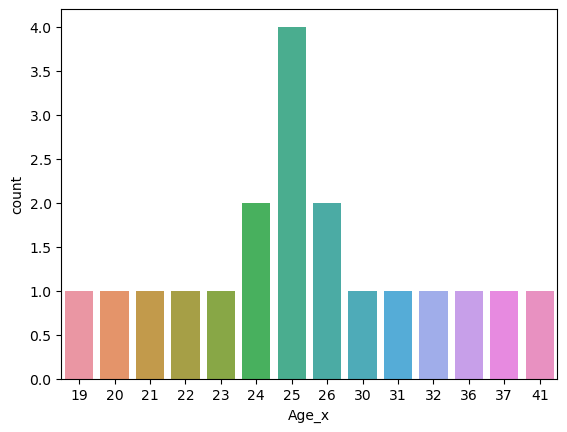

In [252]:
sns.countplot(x = df3['Age_x'])

<AxesSubplot:xlabel='Policy_Status_y', ylabel='count'>

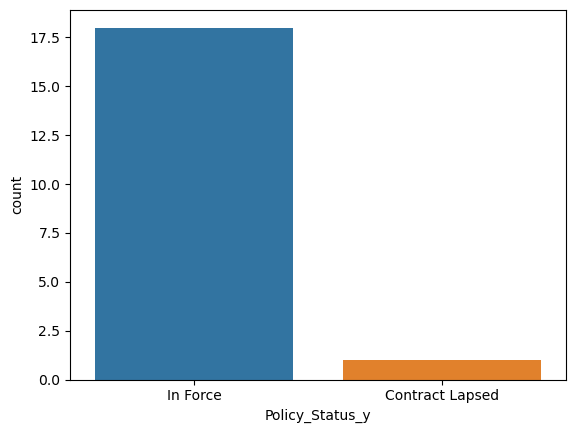

In [255]:
sns.countplot(x=df3['Policy_Status_y'])

<AxesSubplot:xlabel='Education_x', ylabel='count'>

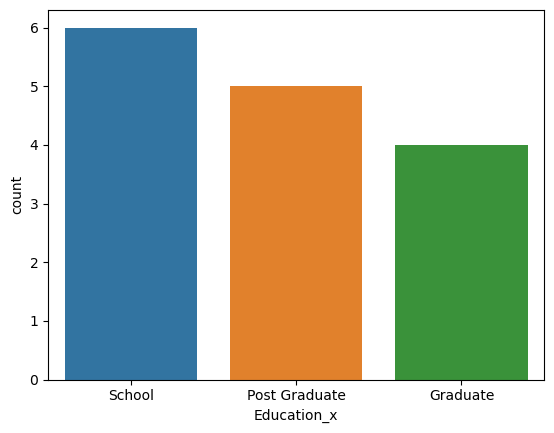

In [259]:
sns.countplot(x=df3['Education_x'])

<AxesSubplot:xlabel='Occupation_x', ylabel='count'>

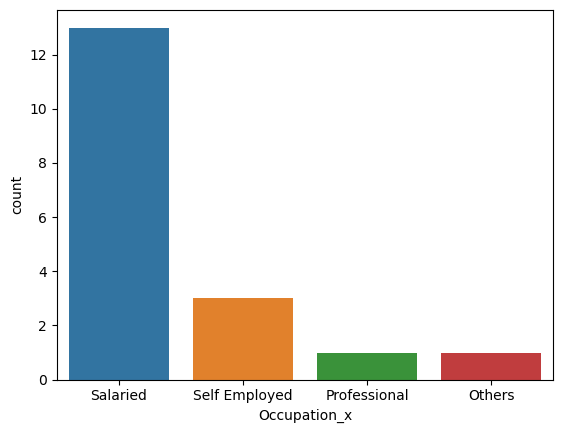

In [261]:
sns.countplot(x=df3['Occupation_x'])

<AxesSubplot:xlabel='Product', ylabel='count'>

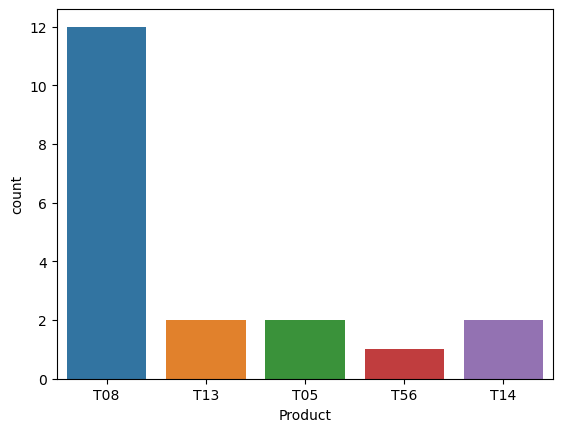

In [265]:
sns.countplot(x=df3['Product'])

Data is fit for deriving insights. By looking at these data points, we can figure out the Quality lead for the top funnel and target similar users based on these features

<AxesSubplot:xlabel='Channel', ylabel='Income_y'>

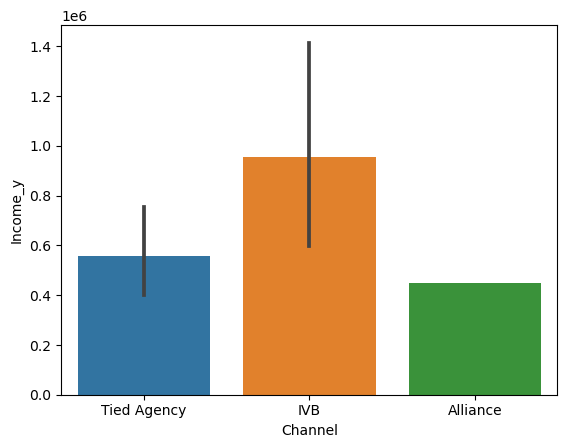

In [277]:
sns.barplot(y=df3['Income_y'],x=df3['Channel'])

3. Here, the biggest challenge is to pull the data from the data sources. We have 2 types of data that would be coming in from 2 different sources. If the sources are on the same system then we can join these two tables on respective primary and foreign keys.
If the data sources are different, we will have to raise a request to the tech team to create APIs for the same to send in the data stream. The data stream which will be in JSON format can be normalised and stored in dataframes using Python scirpting and we can transform the data further.
After that, once the desired table is obtained, we can push the data on any cloud platform (GCP Bigquery or AWS redshift) where the clean data can be used for visualization and dashboard creation.
This whole process can be automated on t-1 day basis using scheduler/cron jobs.